# Redes Neuronales Artificiales & Deep Learning

## Objetivos de este curso

- **Conocer, entender y aplicar algunos modelos clásicos de Redes Neuronales Artificiales**, y algunas habilidades útiles en la práctica.
- **Conocer los conceptos básicos del Aprendizaje Profundo y aplicar las herramientas para desarrollar aplicaciones de machine learning**.
- **Aprender a utilizar los modelos de Deep Learning de Keras con la biblioteca Scikit-Learn de Python**, y evaluar los modelos de Keras utilizando la validación cruzada en scikit-learn (la biblioteca scikit-learn es la biblioteca más popular para Machine Learning en Python).
- **Identificar el tipo de red neuronal más adecuado para cada problema**, y las limitaciones de cada arquitectura.
- **Presentar a Python como herramienta de simulación de Redes Neuronales Artificiales**, y el ambiente de trabajo del curso!!!

## Schedule:

- Comenzando...
- Introducción
- Perceptrón
- Redes neuronales estáticas
- Redes recurrentes y mapas auto-organizados
- Memorias asociativas y Redes de funcion de base radial
- Introducción a las bibliotecas de aprendizaje profundo
- Modelos de regresión con Keras
- Modelos de clasificación con Keras
- Redes neuronales convolucionales
- Redes neuronales recurrentes

In [ ]:
# Run this only in Colab
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
colab_path = '/content/drive/My Drive/Colab Notebooks/deep-learning/notebooks/img/'
my_path = 'img/'
valid_path = colab_path # Use one of them depending on the platform

## Redes neuronales estáticas

Cuando se introdujo el modelo del perceptrón como herramienta matemática simplificada del comportamiento de una neurona biológica, se mostró también que este tipo de estructuras era capaz de resolver solo un conjunto limitado de problemas, era útil solo para aquellos problemas separables linealmente. Estos problemas son aquellos en los cuales las salidas (espacio de estados de las variables de salida) están separadas/os en dos categorías. Para el caso de una variable de salida con solo dos posibles estados (compuertas lógicas por ejemplo), salidas que se pueden representar en un plano de dos ejes, estos dos posibles estados de salida se deben poder separar por medio de alguna línea. En el caso mas general, este espacio de estados de salida debe estar dividido en dos regiones por medio de un hiperplano.

Así el problema, cabe preguntar ¿cómo puedo resolver el problema de identificar la función lógica XOR (y cualquier otra dinámica con características similares) utilizando estos modelos neuronales? 

Analizando la función lógica XOR, se puede concluir que el problema de clasificación de patrones con la función lógica XOR se puede resolver si se puede descomponer el espacio de estados en tres (3) regiones como se muestra en la figura, de forma tal que a una región pertenezca una de las categorías de salida, y las otras dos regiones pertenezcan a la segunda categoría. Esto se logra no con una, sino con **dos líneas rectas**.

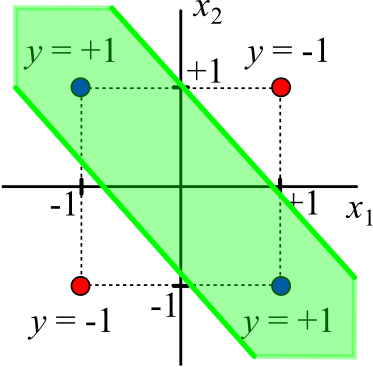

In [ ]:
from IPython.display import SVG
SVG(valid_path + 'intro_fig22.svg')

Es natural pensar que si un perceptrón ($h_1$) define una línea recta en el espacio de estados, dos perceptrones ($h_1$ y $h_2$) definen dos líneas rectas. Por tanto la solución al problema es utilizar dos neuronas, las cuales delimitarían tres regiones en el espacio de estados, regiones que separarían las dos categorías de la salida.

Sin embargo, para poder elegir entre una región u otra entre las tres existentes, se requiere el uso de otra capa de neuronas (realmente una capa de una sola neurona, $y$), cuyas entradas serán las salidas de las dos neuronas que definen las dos rectas. En total, una red multicapa (dos capas) de tres neuronas, dos neuronas en la primera capa y una neurona en la capa de salida.

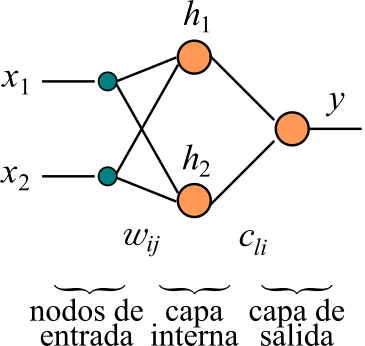

In [ ]:
SVG(valid_path + 'intro_fig23.svg')

Sin embargo, aún falta algo, ¿las entradas $x_1$ y $x_2$ se conectan a la neurona $h_1$ o a la neurona $h_2$? **Pues a las dos!!!** Las entradas deben entrar en paralelo a las dos neuronas, para hacerlo, se requiere de una capa adicional inicial (nodos de entrada). Pero esta capa solo distribuye las entradas hacia las neuronas de la capa interna, por tanto esta capa esta conformada por nodos, no por neuronas.

Las dos regiones que contienen los puntos (-1, -1) y (+1, +1) se asocian con una categoría de salida, -1, y la zona central sombreada se asocia a la segunda categoría de salida, +1. De esta forma es posible encontrar una solución al problema de la función lógica XOR, utilizando no un perceptrón, sino una red perceptrón multicapa de tres capas, con dos nodos de entrada, dos neuronas en la capa oculta o intermedia, y una neurona en la capa de salida, es decir, una red neuronal de tamaño 2-2-1.

Una cosa importante es que el número de constantes de ajuste, o pesos de la red, ha aumentado. El vector de pesos se ha convertido ahora en una matriz de pesos. Algunos de estos pesos, $\omega_{ij}$, ajustan las conexiones entre los nodos de entrada y la capa oculta, y el resto, $c_{li}$, ajustan las conexiones entre la capa oculta y la capa de salida.

Ahora bien, la mayoría de los problemas reales no son tan sencillos como la función XOR. La relación entre las variables de entrada y las categorías de salida puede ser tan compleja como la mostrada en la figura de abajo. En este último caso, la definición de las regiones para cada categoría resulta ser un problema nada trivial. En general, una capa permite separar medio plano, dos capas son capaces de crear regiones cerradas o convexas, y tres capas permiten lidiar con áreas de cualquier complejidad.

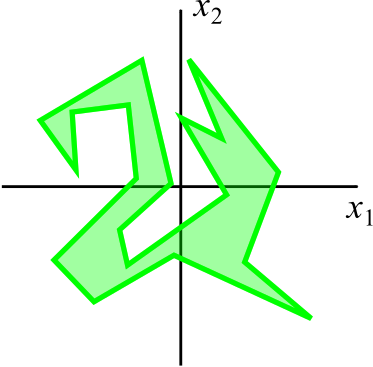

In [ ]:
SVG(valid_path + 'intro_fig24.svg')

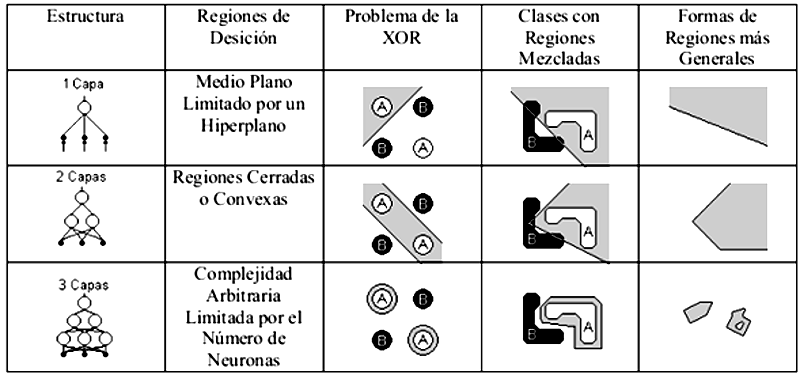

In [ ]:
from IPython.display import Image
Image(filename=valid_path + 'intro_fig25.png')

En conclusión, el perceptrón multicapa es una red neuronal artificial formada por múltiples capas de neuronas. Este tipo de estructura le permite al sistema resolver problemas que no son linealmente separables.

### Características generales

Algunas ventajas importantes de las redes neuronales artificiales multicapa son:

1. Una red neuronal artificial es capaz de identificar cualquier sistema a través de un proceso de entrenamiento, siempre y cuando se diseñe la estructura adecuada de la red. Esto significa que no importa si el sistema corresponde a una caja negra con comportamientos difíciles de modelar, la red neuronal siempre brinda una opción de trabajo con un alto desempeño.
2. Siguiendo la idea del aspecto anterior, sistemas con un modelo matemático complejo pueden ser abordados con una red neuronal, con una estructura más simple de trabajar y más cercana al comportamiento real, siempre y cuando se puedan obtener patrones Entrada/Salida del sistema.
3. Como es de esperar, en el caso de problemas no lineales la red neuronal muestra un alto desempeño, velocidad, confiabilidad y robustez.
4. En el caso de implementaciones hardware, la red neuronal posee una característicamente robusta intrínseca dada su estructura paralela. En el evento de falla de algunos de sus elementos, la red aún continúa con su funcionamiento con un alto nivel de desempeño.

Sin embargo, pese a éstas ventajas, también es posible identificar algunos inconvenientes de éste tipo de estructuras:

1. Las redes neuronales multicapa requieren de un proceso de entrenamiento. Dado que éste entrenamiento depende de los patrones Entrada/Salida del sistema, se requiere de un proceso de entrenamiento para cada problema.
2. No existen reglas concretas que permitan definir de forma exacta la estructura y el tamaño de la red. La definición de la estructura se hace de acuerdo a las características del problema, y a un múltiple conjunto de pruebas de desempeño.
3. Tampoco existen reglas concretas de entrenamiento. De acuerdo al algoritmo de entrenamiento seleccionado y el comportamiento de los patrones de Entrada/Salida, el proceso de entrenamiento puede llegar a consumir mucho tiempo o incluso no converger.
4. Requieren muchos datos de entrenamiento. Si bien la complejidad computacional no es alta, el costo de memoria si lo puede ser. Además, se requiere generar dicha tabla de datos de entrenamiento.
5. Las redes neuronales se comportan como una caja negra, no es posible identificar donde se encuentra la información del sistema, y por tanto es difícil realizar cambios si no es por medio de un nuevo entrenamiento.

### Estructura de una red multicapa

Una red neuronal multicapa esta conformada por una estructura paralela que procesa información de forma distribuida. Esta conformada por un gran número de elementos de procesamiento, las neuronas, que se interconectan entre sí. Cada neurona tiene una conexión de salida que puede llegar a una o más neuronas, las cuales se encuentran organizadas por capas.

La estructura puede ser totalmente o localmente conectada. En el primer caso, cada salida de una neurona de la capa $n$ es entrada de todas las neuronas de la capa $n+1$ (ver figura abajo, red neuronal con una sola capa oculta). En el segundo caso, cada neurona de la capa $n$ es entrada de una serie de neuronas (una región conformada por un grupo de neuronas) de la capa $n+1$.

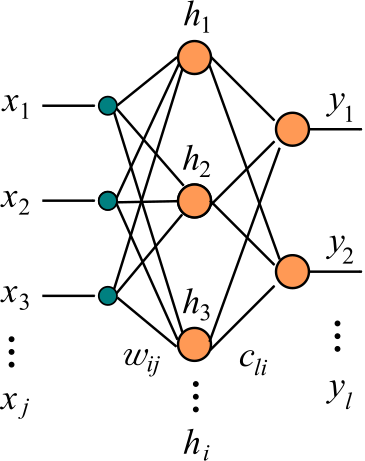

In [ ]:
SVG(valid_path + 'intro_fig26.svg')

### Entrenamiento de redes multicapa (Algoritmo Propagación Inversa)

Este es el caso general en el cual la RNA cuenta con función de activación.

Requiere una función de activación continua (derivable). Dado que es un esquema de entrenamiento por gradiente, la actualización de los pesos se hace por medio de:

$$\boldsymbol{w}_{k+1}=\boldsymbol{w}_{k}+\alpha\left(-\nabla_{k}\right)$$

El error cuadrático de las salidas es:

$$e^{2}=e_{1}^{2}+e_{2}^{2}+\cdots=\left(d_{1}-y_{1}\right)^{2}+\left(d_{2}-y_{2}\right)^{2}+\cdots=\underset{l=1}{\sum^{L}}\left(d_{l}-y_{l}\right)^{2}$$

Donde $L$ es el número total de salidas $y$ de la red neuronal.

$$\begin{array}{c}
y_{1}=c_{11}h_{1}+c_{12}h_{2}+c_{13}h_{3}+\cdots+c_{01}\\
y_{2}=c_{21}h_{1}+c_{22}h_{2}+c_{23}h_{3}+\cdots+c_{02}\\
y_{3}=c_{31}h_{1}+c_{32}h_{2}+c_{33}h_{3}+\cdots+c_{03}\\
\vdots
\end{array}$$

Es decir:

$$y_{l}=\underset{i=1}{\sum^{I}}c_{li}h_{i}+c_{0l}$$

Donde $I$ es el número total de neuronas $h$ en la capa oculta de la red neuronal.

El gradiente del error cuadrático respecto a los pesos de salida es:

$$\nabla_{l}=\frac{\partial e^{2}}{\partial c_{li}}=-2e_{l}h_{i}$$

Por lo tanto, la actualización es de la forma:

$$c_{li_{k+1}}=c_{li_{k}}+2\alpha e_{l}h_{i}$$

La salida de las neuronas de la capa oculta es:

$$\begin{array}{c}
h_{1}=\sigma\left(s_{1}\right)=\sigma\left(w_{11}x_{1}+w_{12}x_{2}+w_{13}x_{3}+\cdots+w_{01}\right)\\
h_{2}=\sigma\left(s_{2}\right)=\sigma\left(w_{21}x_{1}+w{}_{22}x_{2}+w_{23}x_{3}+\cdots+w_{02}\right)\\
h_{3}=\sigma\left(s_{3}\right)=\sigma\left(w_{31}x_{1}+w_{32}x_{2}+w_{33}x_{3}+\cdots+w{}_{03}\right)\\
\vdots
\end{array}$$

Es decir:

$$h_{i}=\sigma\left(s_{i}\right)=\sigma\left(\underset{j=1}{\sum^{J}}w_{ij}x_{j}+w_{0i}\right)$$

Donde $J$ es el número total de entradas $x$ de la red neuronal.

El gradiente del error cuadrático respecto a los pesos de la capa oculta es:

$$\nabla_{i}=\frac{\partial e^{2}}{\partial w{}_{ij}}=-2\left(\underset{l=1}{\sum^{L}}c_{li}e_{l}\right)\sigma'\left(s_{i}\right)x_{j}$$

Por lo tanto, la actualización es de la forma:

$$w_{ij_{k+1}}=w_{ij_{k}}+2\alpha\delta_{i}\sigma'\left(s_{i}\right)x_{j}$$

Donde el error ponderado de la red $\delta_{i}$ esta dado por:

$$\delta_{i}=\underset{l=1}{\sum^{L}}c_{li}e_{l}$$

El algoritmo es lento, ya que trabaja con información puntual (un patrón a la vez) y no con un panorama claro de la superficie de error. En espacios de alta dimensión la superficie de error contiene pendientes suaves pero altamente curvadas, un paso pequeño ($\alpha$ pequeño) tarda bastante en bajar por la pendiente, y un paso grande ($\alpha$ grande) produce oscilaciones.

### Momentum

Se ha propuesto una modificación al algoritmo de propagación inversa con la idea de adicionar una inercia a las formulas de actualización para tener en cuenta los cambios realizados durante la presentación del patrón anterior. Las formulas modificadas con el término adicional de momentum son:

$$c_{li_{k+1}}=c_{li_{k}}+2\alpha e_{l}h_{i}+\mu\left(c_{li_{k}}-c_{li_{k-1}}\right)$$

$$w_{ij_{k+1}}=w_{ij_{k}}+2\alpha\delta_{i}\sigma'\left(s_{i}\right)x_{j}+\mu\left(w_{ij_{k}}-w_{ij_{k-1}}\right)$$

El momentum filtra las variaciones de alta frecuencia de la superficie de error en el espacio de pesos. La constante $\mu$ es el factor que determina la importancia dell momentum. El momentum trata de hacer el cambio del vector de pesos en la misma dirección anterior evitando cambios erráticos (un efecto de memoria a corto plazo).

### Rata de aprendizaje dinámica

Una rata de aprendizaje dinámica puede acelerar la convergencia de la red. La idea es que $\alpha$ cambie según el error de aprendizaje, $\alpha$ debe ser grande para un error grande y pequeño para un error pequeño.

$$\alpha=\alpha_{0}e$$

$$\alpha=\alpha_{0}csc\left(\pi e\right)$$

$$\alpha=3\alpha_{0}csc\left(\pi e\right)$$

$$\alpha=\alpha_{0}\left[2+cos\left(2\pi e\right)\right]$$

$$\alpha=\alpha_{0}\left[1+tan\left(\pi e-\frac{\pi}{2}\right)\right]$$

donde $\alpha_{0}$ es la rata de aprendizaje inicial.

### Generalización

Una de las características más importantes de las RNA es su habilidad para reconocer o clasificar patrones nunca antes presentados a la red. Aún es tema de investigación cómo el tamaño o la estructura de la red afectan esta cualidad.

Para mejorar la capacidad de generalización, la RNA se diseña con un gran número de neuronas ocultas, igual al número de patrones de entrenamiento (una neurona oculta por patrón). Cuando el error empieza a disminuir, se eliminan neuronas (podar la red), y se entrena de nuevo la red a partir de los valores de pesos anteriores. Un número pequeño de neuronas ocultas extraen características generales, lo cual implica una buena generalización. Por el contrario cuando hay demasiadas neuronas en la capa oculta, la red memoriza los patrones y no sus características. En el otro extremo, si el número de neuronas ocultas es muy pequeño, la red no aprende los patrones.

## Taller (estudio en casa, no se entrega)

Para la función lógica XOR defina un conjunto de patrones de entrenamiento adecuado, y dos redes neuronales multicapa adecuadas, a fin de reproducir el comportamiento de la función lógica.

### Solución

La función lógica no tiene por que trabajar con valores discretos. De hecho, dado que la función de activación es continua (se selecciona $tanh$ debido a los rangos de la variable de salida) y tiende asintóticamente a 1 y -1, los valores de operación también pueden ser continuos, y en general, diferentes a 1 y -1, por lo que, respetando la tabla de la función lógica, es posible definir los patrones de entrenamiento mostrados en la siguiente tabla.

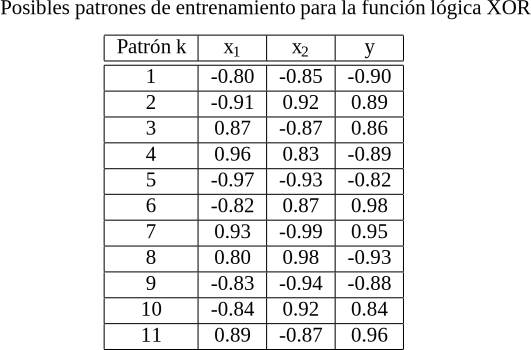

In [ ]:
SVG(valid_path + 'intro_fig27.svg')

Cualquiera que sea la estructura seleccionada para la red neuronal, esta debe tener dos nodos de entrada y una neurona de salida. De acuerdo al análisis realizado a la estructura neuronal requerida para identificar esta función lógica, una posible red neuronal que resuelve el problema seria una red 2-2-1, con función de activación $tanh$. Dado que no es necesario incrementar el numero de capas internas para este problema, la segunda arquitectura solicitada puede construirse jugando con el numero de neuronas de la capa interna, por ejemplo, una red 2-6-1.